<a href="https://colab.research.google.com/github/kkiprono4/electric-car-usage/blob/main/electric_car_usage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Defining the question

a) Specifying the Data Analytic Question: 

PROBLEM STATEMENT
Investigate a claim about the blue cars from the autilob dataset.

Null hypothesis: the average number of blue cars taken is not different that of the blue cars returned

Alternative hypothesis: the average number of blue cars taken is different that of the blue cars returned(CLAIM:)

b) Defining the Metric for Success

Exploratory Data Analysis

Univariate, Bivariate Analysis

Create Visualizations

Testing a Hypothesis

Conclusion

c) Understanding the context

Just like before, we have been tasked to understand electric car usage by solving for another research question. We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset. In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made.

d) Relevance of the data

The data that was used for survey was obtained from an open datasource. The provided dataset is a daily aggregation, by date and postal code, of the number of events on the Autolib network (car-sharing and recharging). the dataset used was ranging from january to july of 2018 and is relevant for this analysi

In [ ]:
# Importing libraries we will use in this project

import pandas as pd

import numpy as np

# Visualization library
import seaborn as sns 

# plotting library
import matplotlib.pyplot as plt 

Loading the dataset


In [ ]:
# We will call our dataset df1

df1 = pd.read_csv("http://bit.ly/DSCoreAutolibDataset")


In [ ]:
# Viewing the first five entries of our dataset

df1.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
#  Viewing the last five entries of our dataset

df1.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [ ]:
# Checking the dataset information

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [ ]:
#the shape 
df1.shape

(16085, 13)

In [ ]:
# Checking the dataset shape i.e. number of rows and columns

print('The Autolib dataset has ' + str(df1.shape[0]) + ' rows and ' +  str(df1.shape[1]) + ' columns' )

The Autolib dataset has 16085 rows and 13 columns


In [ ]:
# Checking the data types in our dataset

df1.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [ ]:
# Checking the columns names in our dataset

df1.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [ ]:
#Summary description of our dataset

df1.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [ ]:
# In this project we are required to work with either tha weekdays or the weekends.
# I choose weekdays


df2 = df1[df1['day_type'] == 'weekday']

In [ ]:
# printing the dataset shape
# viewing the new dataset
print(df2.shape)

df2.head()

(11544, 13)


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


Data cleaning

In [ ]:
# Removing spaces in the columns names

df2.columns = df2.columns.str.lower().str.replace(" ", "")

In [ ]:
# confirming the columns names

df2.columns

Index(['postalcode', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [ ]:
# Dropping columns we do not need for this analysis
# We are only dealing with Blue cars only for this project. 

df2.drop(['utilib_taken_sum', 'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum', 'slots_freed_sum','slots_taken_sum','n_daily_data_points','date'], axis = 1, inplace = True)
df2.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,postalcode,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
0,75001,0,weekday,110,103
1,75001,1,weekday,98,94
2,75001,2,weekday,138,139
3,75001,3,weekday,104,104
4,75001,4,weekday,114,117


In [ ]:
# Checking for missing values in our dataset by column

df2.isnull().sum()


# we have no missing values from the output below.

postalcode               0
dayofweek                0
day_type                 0
bluecars_taken_sum       0
bluecars_returned_sum    0
dtype: int64

outliers

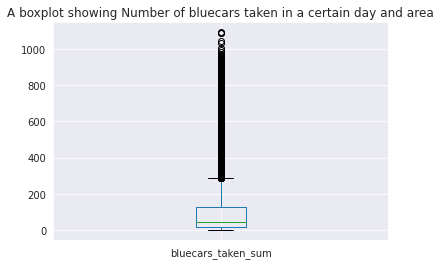

In [ ]:
# Using box plots to check for outliers

# checking for outliers on the variable (bluecars_taken_sum) using boxplot

# Using pandas to create a boxplot
# Giving a title to our chart
# Displaying our chart


df2.boxplot(['bluecars_taken_sum'])
plt.title("A boxplot showing Number of bluecars taken in a certain day and area")
plt.show()


# The boxplot shows profusion of outliers indicated by the black points.
# We will not remove them here.
# we shall investigate them instead.

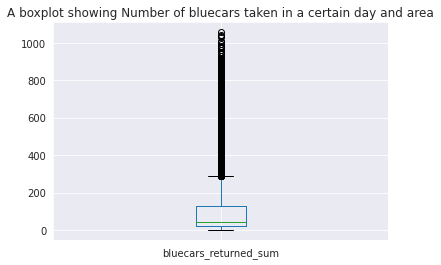

In [ ]:
# Using box plots to check for outliers

# checking for outliers on the bluecars_returned_sum using boxplot

# Using pandas to create a boxplot
# Giving a title to our chart
# Displaying our chart


df2.boxplot(['bluecars_returned_sum'])
plt.title("A boxplot showing Number of bluecars taken in a certain day and area")
plt.show()


# The boxplot shows profusion of outliers indicated by the black points.
# We will not remove them here.
# we shall investigate them instead.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


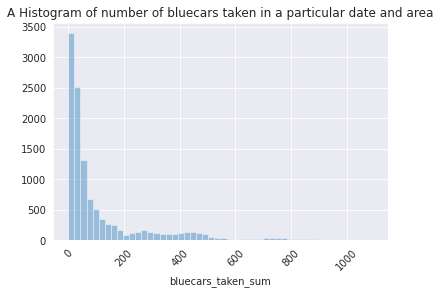

In [ ]:
# Histogram of the bluecars_taken sum

# Using seaborn library to visaulize
# Giving our chart a title
# Displaying the x axis at a 45 degree angle
# Displaying our chart


sns.set_style("darkgrid")
sns.distplot(df2["bluecars_taken_sum"], kde = False)
plt.title("A Histogram of number of bluecars taken in a particular date and area")
plt.xticks(rotation = 45)
plt.show()



# the histogram shows us that the blue cars taken distribution is skewed to the right
# this is because the tail is long to the right hand side

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


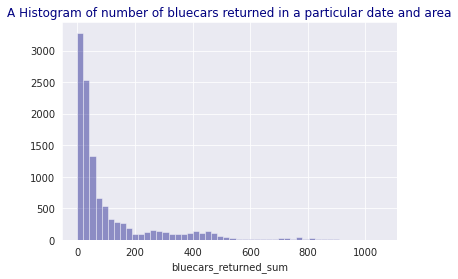

In [ ]:
# Histogram of the bluecars_returned sum

# Using seaborn library to visualize
# Giving our chart a title
# Displaying our chart

sns.set_style("darkgrid")
sns.distplot(df2["bluecars_returned_sum"], kde = False, color = 'navy')
plt.title("A Histogram of number of bluecars returned in a particular date and area", color = 'navy')
plt.show()


# the histogram shows us that the blue cars returned distribution is skewed to the right
# this is because the tail is long to the right side

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


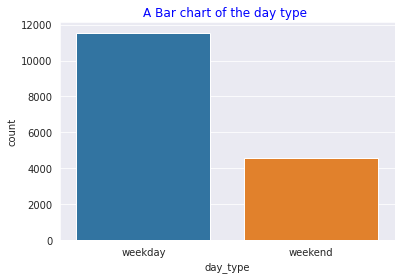

In [ ]:
#  Plotting a bar plot of day_type	variable 
# I used the original dataset to show the comparison between weekdays and weekends frequencies.

# Using seaborn to create a bar chart
# Giving a title to our chart
# Displaying our chart

sns.set_style('darkgrid')
sns.countplot(df1.day_type)
plt.title('A Bar chart of the day type ', color = 'blue')
plt.show()


# The bar chart shows that blue cars usage is more during weekdays than during the weekend.

Measures of central tendency

In [ ]:
#MEAN
# Calculating mean of the target columns defined below.
df2[["bluecars_taken_sum","bluecars_returned_sum"]].mean()

# The output below shows the mean/average of each of the target column/variable.

bluecars_taken_sum       116.028673
bluecars_returned_sum    115.639380
dtype: float64

In [ ]:
#MODE
# Displaying the mode by column
df2[["bluecars_taken_sum","bluecars_returned_sum"]].mode()


# The output below shows the mode of each of the variables of interest.

,bluecars_taken_sum,bluecars_returned_sum
0,12,12


In [ ]:
#MEDIAN
# Displaying the median by column
df2[["bluecars_taken_sum","bluecars_returned_sum"]].median()

# the output indicates the median value of each variable defined in our columns of interest.

bluecars_taken_sum       42.0
bluecars_returned_sum    42.0
dtype: float64

In [ ]:
# STANDARD DEVIATION

# Average distance between each obseravtion from the mean.

df2[["bluecars_taken_sum","bluecars_returned_sum"]].std()

 ### The output shows the standard deviation for each target column.

bluecars_taken_sum       169.626905
bluecars_returned_sum    168.344751
dtype: float64

In [ ]:
## VARIANCE 

# It is the square of average distance between each observation and mean. 

df2[["bluecars_taken_sum","bluecars_returned_sum"]].var()

bluecars_taken_sum       28773.286798
bluecars_returned_sum    28339.955275
dtype: float64

In [ ]:
## SKEWNESS 

# A measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.

df2[["bluecars_taken_sum","bluecars_returned_sum"]].skew()

# bluecars_taken_sum and bluecars_returned_sum have a positive value indicating that the data distributions are skewed to the right.

bluecars_taken_sum       2.328198
bluecars_returned_sum    2.328973
dtype: float64

In [ ]:
# KURTOSIS 

# A measure of whether the data are heavy-tailed (profusion of outliers) or light-tailed (lack of outliers) relative to a normal distribution.

df2[["bluecars_taken_sum","bluecars_returned_sum"]].kurt()


 # The kurtosis value in all the columns are greater than zero, therefore their distributions have heavier tails

bluecars_taken_sum       5.553808
bluecars_returned_sum    5.542863
dtype: float64

Visualizations

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


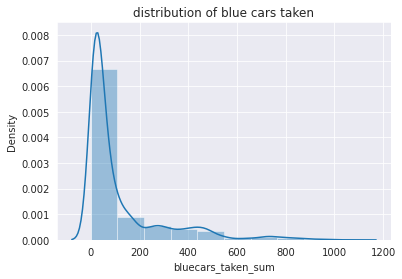

In [ ]:
# Plot bluecars taken
sns.distplot(df2['bluecars_taken_sum'], bins=10)
plt.title('distribution of blue cars taken')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


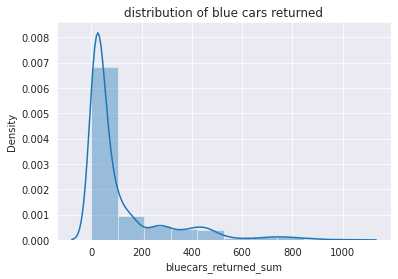

In [ ]:
# Plot bluecars returned 
sns.distplot(df2['bluecars_returned_sum'], bins=10)
plt.title('distribution of blue cars returned')
plt.show()

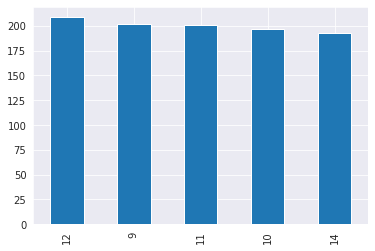

In [ ]:
#Number of blue cars taken
df2['bluecars_taken_sum'].value_counts().head().plot.bar()
plt.show()

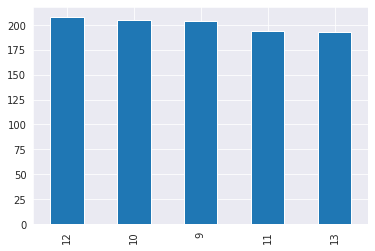

In [ ]:
#Number of blue cars returned
df2['bluecars_returned_sum'].value_counts().head().plot.bar()
plt.show()

Bivariate analysis

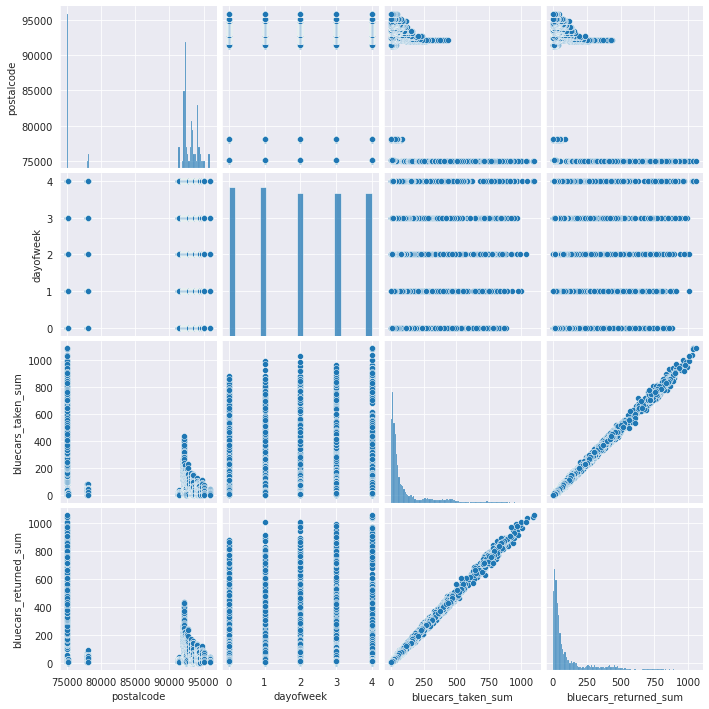

In [ ]:
# Ploting the bivariate summaries and recording our observations
# scatterplot
sns.pairplot(df2)
plt.show()

Text(0.5, 1.0, 'bluecars_taken vs bluecars_returned_sum')

<Figure size 864x720 with 0 Axes>

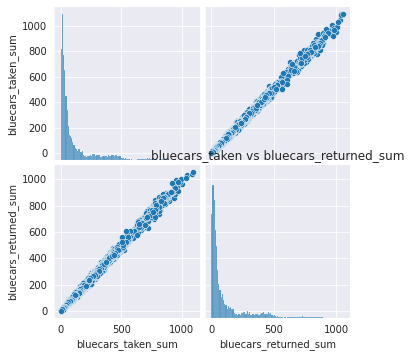

In [ ]:
# Determine correlation between numeric features
plt.figure(figsize=(12,10))
sns.pairplot(df2[['bluecars_taken_sum','bluecars_returned_sum']])
plt.title('bluecars_taken vs bluecars_returned_sum')

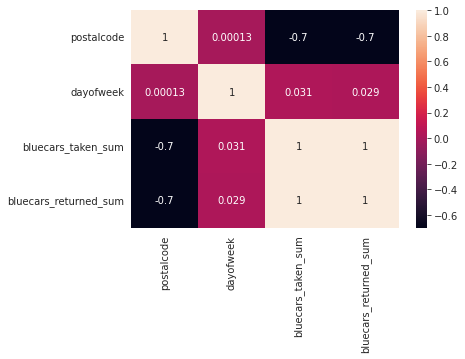

In [ ]:
sns.heatmap(df2.corr(),annot=True)
plt.show()

Hypothesis testing

In [ ]:
##  Null hypothesis: 
      # the average number of blue cars taken is not different than that of the blue cars returned?
##  Alternative hypothesis:  
      # the average number of blue cars taken is different than that of the blue cars returned(***CLAIM:***)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


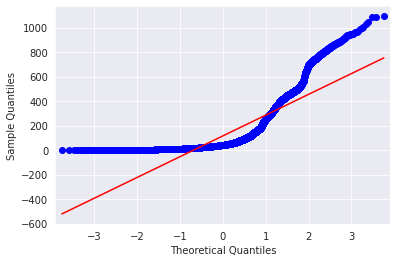

In [ ]:
#NORMALITY TEST
# Importing libraries to plot our Q-Q plot
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# Importing libraries to plot our Q-Q plot
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# q-q plot
qqplot(df2['bluecars_taken_sum'], line='s')
pyplot.show()


#the data doesn't follow a normal distribution

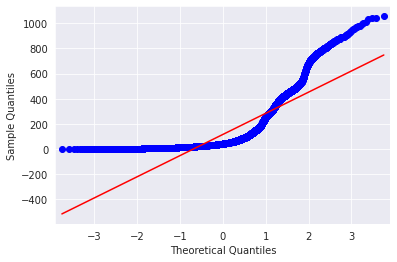

In [ ]:
# q-q plot
qqplot(df2['bluecars_returned_sum'], line='s')
pyplot.show()
 

#the data doesn't follow a normal distribution

stratified sampling

In [129]:
# Stratified sample
df3 = df2.groupby('dayofweek', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))
df3

,postalcode,dayofweek,bluecars_taken_sum,bluecars_returned_sum
8060,92340,0,8,12
11395,93310,0,11,8
2407,75016,0,666,693
12802,93700,0,35,30
854,75006,0,236,222
...,...,...,...,...
13162,94100,4,2,2
13243,94100,4,3,3
7652,92320,4,69,61
11271,93300,4,11,13


In [137]:
# pop mean
a = df1['BlueCars_taken_sum'].mean()
d = df1['BlueCars_returned_sum'].mean()
a,d

(125.92695057506994, 125.912713708424)

In [136]:
# sample mean
b = df3['bluecars_taken_sum'].mean()
e = df3['bluecars_returned_sum'].mean()
b,e

(108.91507798960139, 108.4584055459272)

In [139]:
# sample standard deviation
c = df3['bluecars_taken_sum'].std()
c

160.22231865228102

In [140]:
# calculating the z-score
zscore = (b-a) / c
zscore

-0.10617667206769237

In [142]:
#calculating the p value
from scipy.stats import norm
p = norm.cdf(zscore)
p

0.45772108965010394

In [143]:
#interpretation of the p value
# alpha value is 0.05 or 5%
if p < 0.05:   
   print(" we are rejecting null hypothesis")
else:
  print("we fail to reject null hypothesis")

we fail to reject null hypothesis


CONCLUSION

We fail to reject the null hypothesis becase there is not sufficient evidence to prove that the average means of the bluecars taken and returned are not equal.